  

> #### Krithika Devi Chandran (2211570)
> #### *Cohort:* CDB22DW022, AI & ML



# CIFAR-10 image classification project

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.
The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

1. airplane										
2. automobile										
3. bird										
4. cat										
5. deer										
6. dog										
7. frog										
8. horse										
9. ship										
10. truck										



In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing ssl library, which stands for Secure Sockets Layer 
# ssl is designed to create secure connection between client and server. 
# Secure means that connection is encrypted and therefore protected from eavesdropping. It also allows to validate server identity.
import ssl
ssl.create_default_https_context = ssl._create_unverified_context

## Loading Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [ ]:
from tensorflow.keras.datasets import cifar10     # CIFAR10 dataset is included in Keras

(X_train, y_train), (X_test, y_test) =  cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# 32 x 32 pixel images
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


In [ ]:
X_train[0].shape

(32, 32, 3)

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

Visualizing sample images of the training dataset.

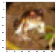

In [ ]:
# FROG
plt.figure(figsize=(6,4), dpi = 16)
plt.imshow(X_train[0]);

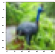

In [ ]:
# PEACOCK
plt.figure(figsize=(6,4), dpi = 16)
plt.imshow(X_train[6]);

In [ ]:
X_test.shape # test shape
# 10,000 test images
# 32 x 32 x 3 (height, width, depth) --> depth represents 3 channels (RGB channel)

(10000, 32, 32, 3)

In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Pre-processing

In [ ]:
X_train.max()

255

In [ ]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')

In [ ]:
X_train /= 255
X_test /= 255

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_test.shape

(10000, 1)

### One-hot encoding

The Keras API provides a `to_categorical()` method that can be used to **one-hot encode** *integer* data.

> Why we need to do the encoding for labels?

Encoding categorical labels is a process of converting categorical label into integer format **so that the data with converted categorical values can be provided to the models to give and improve the predictions**.

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [ ]:
Y_train

array([[0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 1.000000],
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 1.000000],
       ...,
       [0.000000, 0.000000, 0.000000, ..., 0.000000, 0.000000, 1.000000],
       [0.000000, 1.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000],
       [0.000000, 1.000000, 0.000000, ..., 0.000000, 0.000000, 0.000000]],
      dtype=float32)

# Building the Model

In [ ]:
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers

The `Sequential` model definition takes a list of layers as an argument, specifying the calculation order from the input to the output.

In [ ]:
model = Sequential()

In [ ]:
# 1st Convolution layer
model.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape=(32,32,3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))

# 2nd Convolution layer
model.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))
# Normalize the activations of the previous 2nd convolution layer at each feature map
model.add(BatchNormalization(axis=-1))     
# 1st Pooling layer after 2nd convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))
# randomly turning off some of the neurons in previous 2nd convolution layer,
# using dropout so that learning won't get memorized.
model.add(Dropout(0.2))

In [ ]:
# 3rd Convolution layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))  
# 4th Convolution layer
model.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))

# Normalize the activations of the previous 4th convolution layer at each feature map
model.add(BatchNormalization(axis=-1))  
# 2nd Pooling layer after 4th convolution layer
model.add(MaxPooling2D(pool_size=(2,2)))   
# randomly turning off some of the neurons in previous 4th convolution layer,
# using dropout so that learning won't get memorized.
model.add(Dropout(0.2))  

In [ ]:
# 5th Convolution layer
model.add(Conv2D(filters = 128, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))
# Normalize the activations of the previous 5th convolution layer at each feature map
model.add(BatchNormalization(axis=-1))  
# 3rd Pooling layer after 5th convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) 
# randomly turning off some of the neurons in previous 5th convolution layer,
# using dropout so that learning won't get memorized.
model.add(Dropout(0.2))  

In [ ]:
# Flattened layer
model.add(Flatten())
# randomly turning off some of the neurons in flattened layer,
# using dropout so that learning won't get memorized.
model.add(Dropout(0.3)) 

In [ ]:
# Fully connected Dense layer after flattened layer
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(units = 64, activation = 'relu'))

In [ ]:
# Final output layer
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

**CNN Model is Made up of Total 19 Layers. Lets Break them up!**

* First Layer in Convlution2D Layer havin `32 filters` of `(3,3) size` here `padding=same` is used to preserve the first and Last row and Column from Getting Ignored that results in padding with zeros evenly to the left/right or up/down of the input. It have all neighbors Activation function is Relu Providing Same functionality as multi-layer perceptron.Input_shape Parameter takes input shape of train data (X_train).

* Second Layer is Again a Conv2D Layer similar to first Layer.

* Batch Normalization Normalize the activations of the previous layer at each batch

> Batch normalization differs from other layers in several key aspects. 
`BatchNormalization` allows each layer of a network to learn by itself a little bit more independently of other layers. It adds two trainable parameters to each layer, so the normalized output is multiplied by a "standard deviation" parameter (gamma) and add a "mean" parameter (beta).

> Batch Normalization reduces overfitting because it has a slight regularization effects. Similar to dropout, it adds some noise to each hidden layer's activations. Therefore, if we use batch normalizaion, we will use less dropout, which is a good thing because we are not going to lose a lot of information. However, we should not depend only on batch normalizaion for regularization; we should better use it together with dropout.

> **This Layer that normalizes its inputs.** Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.

> Initialize the model along with the input shape to be and the channels dimension itself. That is here, `input_shape = (28, 28, 1)` - the width, height and depth parameters that affects the volume shape. For single channel is specified which is set as `axis = -1`, the depth which is taken into BatchNormalization.

* Next is Max Pooling Which reduce the Dimenson of Model Half. MaxPooling takes the filter size here (2,2) ,It read the Whole Input and Passes 2X2 filter which selects the maximum value from chosen matrix and passes that to next level.

* Adding A Dropout Layer to reduce the number of Neurons. Here 20% neurons Are Reduced.

* Next Five Layers are Similar to first 5 which Conv2D having 64 filters.

* Next Four Layers are Similar to first layer which Conv2D having 128 filters.

* 15th Layer is Flatten which Flatten the Input From Previous Layer (4,4,128) in A Single Matrix of Size 2048

* Adding A Dropout Layer to reduce the number of Neurons. Here 30% neurons Are Reduced .

* 2 Dense Layer is added to Make a Fully Connected Network with 128 neurons using `Relu` Activation Function

* Final Ouput Layer with 5 Categories to Predict and by Using a `Softmax` activation Function.

> The softmax function handles multi-class classificatin problems, which is also a type of sigmoid function that helps to handle binary classification. **Softmax is very useful to predict the probabilities of each classes.**

## Visualizing the model summary

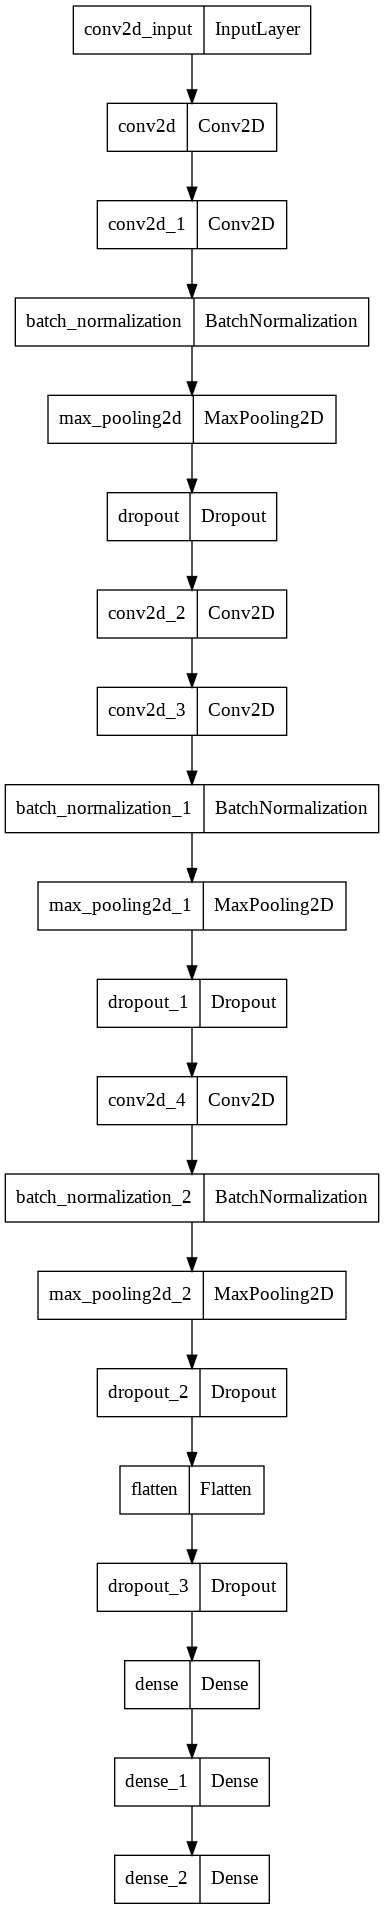

In [ ]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

Before fitting, the model has to be compiled. The difference between the actual output and desired output is calculated using the **loss function**, and the **optimizer function** directs how the weights should be adjusted.

When compiled for training, the model is given:

* **Loss function** - (to measure error) A way of measuring how far off predictions are from the desired outcome. (The measured difference is called the "loss")

[ https://peltarion.com/knowledge-center/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy ]

The below model is compiled by `categorical_crossentropy` losses which is used in multi-class classification tasks. The model uses the categorical crossentropy to learn to give a high probability to the correct digit and a low probability to the other digits.

Since **softmax** activation function is used, it is only recommended to use the **categorical_crossentropy** loss function.

* **Optimizer function** - A way of adjusting internal values in order to reduce the loss.

The below model is compiled by `RMSprop (Root Mean Square Propagation)` Optimization. It does not decay the learning rate too quickly preventing convergence.The gist of RMSprop is to:

  1. Maintain a moving (discounted) average of the square of gradients
  2. Divide the gradient by the root of this average

**Learning Rate** used here for Adam Optimizer is `0.001 (default)` which determines how fast or slow we will move towards the optimal weights.

    *  If the learning rate is very large we will skip the optimal solution. 

    * If the learning rate is too small we will need too many iterations to converge to the best values.


* **Metrics** -  `accuracy` metrics is used here.

In [ ]:
# define optimizer and compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop', metrics = ['accuracy'])

## Model Fitting

Train the model by calling the `fit` method.

Before executing a model, creating a earlystopping callback in order to stop the Traning on given Criteria.

EarlyStopping is used here is to monitor the **validation loss** (`val_loss`) value to stop the training process if the validation loss is not decreasing for **6 consicutive Epochs (`patience=6`)**.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=6, verbose=1)

`Fit` Function takes Lots of Arguments:

* Training data 
* validation_data, that we want to validate our updated network against and jugde whether model is improving
* epoch: No of iteration to be performed.
* callbacks: an array with out EarlyStopping to stop the Traning on given Criteria.

In [ ]:
# Executing the model

hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          callbacks=[early_stop], epochs=200)

Epoch 1/200
1563/1563 [==============================] - 24s 8ms/step - loss: 1.5190 - accuracy: 0.4579 - val_loss: 1.4997 - val_accuracy: 0.5124
Epoch 2/200
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1205 - accuracy: 0.6058 - val_loss: 1.1882 - val_accuracy: 0.6031
Epoch 3/200
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9615 - accuracy: 0.6698 - val_loss: 1.0693 - val_accuracy: 0.6625
Epoch 4/200
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8873 - accuracy: 0.6973 - val_loss: 0.8513 - val_accuracy: 0.7028
Epoch 5/200
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8395 - accuracy: 0.7185 - val_loss: 0.9912 - val_accuracy: 0.6724
Epoch 6/200
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8075 - accuracy: 0.7300 - val_loss: 0.8914 - val_accuracy: 0.7165
Epoch 7/200
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7794 - accuracy: 0.7414 - val_loss: 0.7539 -

###  Evaluate Model's score
Getting model's loss and accuracy score using `evaluate` on test images that is not trained by the model.

In [ ]:
score = model.evaluate(X_train, Y_train)
print('Train score:', score[0])
print('Train accuracy:', score[1])

1563/1563 [==============================] - 6s 4ms/step - loss: 0.3835 - accuracy: 0.8707
Train score: 0.3835371434688568
Train accuracy: 0.8707000017166138


In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.6340 - accuracy: 0.8015
Test score: 0.6339813470840454
Test accuracy: 0.8015000224113464


`RMSprop` optimizer performs with an test accuracy and test loss of approximately 0.80 and 0.63

## Second type of Model using Adam Optimizer

The procedure follows the same as per previous one.

The below model is compiled by `Adam` Optimization which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

**Learning Rate** used here for Adam Optimizer is `0.001 (default)` which determines how fast or slow we will move towards the optimal weights.


In [ ]:
model_1 = Sequential()

In [ ]:
# 1st Convolution layer
model_1.add(Conv2D(filters = 32, kernel_size=(3, 3), input_shape=(32,32,3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))
# 2nd Convolution layer
model_1.add(Conv2D(filters = 32, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))

# Normalize the activations of the previous 2nd convolution layer at each feature map
model_1.add(BatchNormalization(axis=-1))     
# 1st Pooling layer after 2nd convolution layer
model_1.add(MaxPooling2D(pool_size=(2,2)))
# randomly turning off some of the neurons in previous 2nd convolution layer,
# using dropout so that learning won't get memorized.
model_1.add(Dropout(0.2))

In [ ]:
# 3rd Convolution layer
model_1.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))
# 4th Convolution layer
model_1.add(Conv2D(filters = 64, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))

# Normalize the activations of the previous 5th convolution layer at each feature map
model_1.add(BatchNormalization(axis=-1))  
# 2nd Pooling layer after 5th convolution layer
model_1.add(MaxPooling2D(pool_size=(2,2)))   
# randomly turning off some of the neurons in previous 4th convolution layer,
# using dropout so that learning won't get memorized.
model_1.add(Dropout(0.2))  

In [ ]:
# 5th Convolution layer
model_1.add(Conv2D(filters = 128, kernel_size=(3, 3), padding = 'same',  
                 #kernel_regularizer=regularizers.l2(0.001), 
                 activation = 'relu'))

# Normalize the activations of the previous 5th convolution layer at each feature map
model_1.add(BatchNormalization(axis=-1))  
# 3rd Pooling layer after 5th convolution layer
model_1.add(MaxPooling2D(pool_size=(2,2))) 
# randomly turning off some of the neurons in previous 5th convolution layer,
# using dropout so that learning won't get memorized.
model_1.add(Dropout(0.2))  

In [ ]:
# Flattened layer
model_1.add(Flatten())
# randomly turning off some of the neurons in flattened layer,
# using dropout so that learning won't get memorized.
model_1.add(Dropout(0.3)) 
# Fully connected Dense layer after flattened layer
model_1.add(Dense(units = 128, activation = 'relu'))
model_1.add(Dense(units = 128, activation = 'relu'))
#model.add(Dense(units = 64, activation = 'relu'))
# Final output layer
model_1.add(Dense(10, activation = 'softmax'))
# define optimizer and compile model
model_1.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 64)       

In [ ]:
# Executing the model

hist_1 = model_1.fit(X_train, Y_train, validation_data=(X_test, Y_test),
          callbacks=[early_stop], epochs=200)

Epoch 1/200
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4402 - accuracy: 0.4813 - val_loss: 1.4638 - val_accuracy: 0.4914
Epoch 2/200
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9960 - accuracy: 0.6501 - val_loss: 1.1564 - val_accuracy: 0.6040
Epoch 3/200
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8412 - accuracy: 0.7051 - val_loss: 0.8284 - val_accuracy: 0.7091
Epoch 4/200
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7517 - accuracy: 0.7367 - val_loss: 0.8354 - val_accuracy: 0.7176
Epoch 5/200
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6891 - accuracy: 0.7607 - val_loss: 0.6916 - val_accuracy: 0.7662
Epoch 6/200
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6346 - accuracy: 0.7792 - val_loss: 0.7503 - val_accuracy: 0.7501
Epoch 7/200
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5998 - accuracy: 0.7916 - val_loss: 0.6888 -

In [ ]:
score = model_1.evaluate(X_train, Y_train)
print('Train loss: ', score[0])
print('Train accuracy: ', score[1])

1563/1563 [==============================] - 6s 4ms/step - loss: 0.1843 - accuracy: 0.9407
Train loss:  0.18434803187847137
Train accuracy:  0.9407200217247009


In [ ]:
score = model_1.evaluate(X_test, Y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.5664 - accuracy: 0.8276
Test loss:  0.5664159059524536
Test accuracy:  0.8276000022888184


`Adam` optimizer performs with a test accuracy and train accuracy of approximately 82% and 94%.

Thus comparing to RMSprop and Adam optimizer, here **Adam optimizer performs well** for prediction because of good validation loss percentage after each epoch.

In [ ]:
model_1.save('cifar_10epochs.h5')

## Prediction performance / Inspecting the Output

In [ ]:
losses = pd.DataFrame(model_1.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.440189,0.48128,1.463834,0.4914
1,0.996014,0.65006,1.156432,0.6040
2,0.841242,0.70506,0.828408,0.7091
3,0.751742,0.73674,0.835425,0.7176
4,0.689068,0.76066,0.691570,0.7662


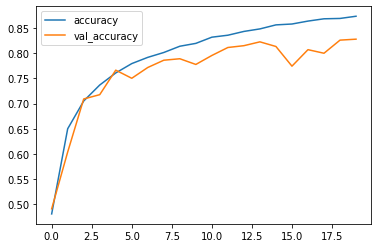

In [ ]:
losses[['accuracy','val_accuracy']].plot()

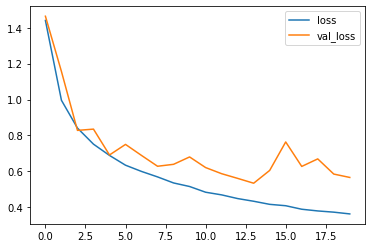

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
model_1.metrics_names

['loss', 'accuracy']

In [ ]:
print(model_1.metrics_names)
print(model_1.evaluate(X_test, Y_test, verbose = 0))

['loss', 'accuracy']
[0.5664159059524536, 0.8276000022888184]


### Getting classification report & confusion matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
# The predict_classes function 
# according to the trained classifier for each input example
predict_x = model_1.predict(X_test)
predict_classes = np.argmax(predict_x,axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(classification_report(y_test,predict_classes))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1000
           1       0.90      0.93      0.91      1000
           2       0.87      0.67      0.76      1000
           3       0.74      0.61      0.67      1000
           4       0.79      0.81      0.80      1000
           5       0.76      0.75      0.76      1000
           6       0.87      0.89      0.88      1000
           7       0.80      0.90      0.85      1000
           8       0.85      0.93      0.89      1000
           9       0.88      0.93      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.82     10000
weighted avg       0.83      0.83      0.82     10000



In [ ]:
confusion_matrix(y_test,predict_classes)

array([[850,  19,   8,   9,   6,   1,   3,   9,  74,  21],
       [  6, 929,   0,   3,   0,   1,   1,   0,   8,  52],
       [ 82,   5, 669,  30,  69,  46,  35,  39,  16,   9],
       [ 29,   7,  25, 612,  56, 125,  50,  59,  19,  18],
       [  9,   3,  30,  24, 815,  20,  28,  60,   8,   3],
       [  7,   6,  18, 105,  38, 750,  11,  48,  10,   7],
       [  6,   5,  11,  24,  27,  13, 890,   7,  13,   4],
       [ 18,   1,   8,  18,  15,  25,   4, 904,   2,   5],
       [ 23,  22,   0,   3,   3,   1,   2,   4, 929,  13],
       [  8,  36,   1,   3,   0,   0,   4,   3,  17, 928]])

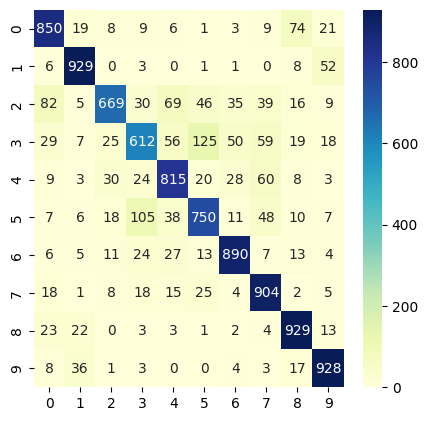

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5), dpi = 100)
sns.heatmap(confusion_matrix(y_test,predict_classes),cmap="YlGnBu", annot=True, fmt='g');

In [ ]:
pd.DataFrame(confusion_matrix(y_test, predict_classes))

,0,1,2,3,4,5,6,7,8,9
0,850,19,8,9,6,1,3,9,74,21
1,6,929,0,3,0,1,1,0,8,52
2,82,5,669,30,69,46,35,39,16,9
3,29,7,25,612,56,125,50,59,19,18
4,9,3,30,24,815,20,28,60,8,3
5,7,6,18,105,38,750,11,48,10,7
6,6,5,11,24,27,13,890,7,13,4
7,18,1,8,18,15,25,4,904,2,5
8,23,22,0,3,3,1,2,4,929,13
9,8,36,1,3,0,0,4,3,17,928


### Comparing Actual label & Predicted label

In [ ]:
y_test # it is in 2d-array

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
y_test_flatten = y_test.flatten()  # converting 2d to 1d, in order to view dataframe of actual and predicted label
y_test_flatten

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
predict_classes

array([3, 1, 8, ..., 5, 0, 7])

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
# Comparing Actual Vs Predicted
AP = pd.DataFrame({'Actual label': y_test_flatten, 'Predicted label': predict_classes})  
AP.head(10)

,Actual label,Predicted label
0,3,3
1,8,1
2,8,8
3,0,0
4,6,6
5,6,6
6,1,1
7,6,4
8,3,3
9,1,1


# Visualizing some of the test images and predicted images 

In [ ]:
labels={0:'airplane',1:'automobile',2: 'bird',3: 'cat',4: 'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

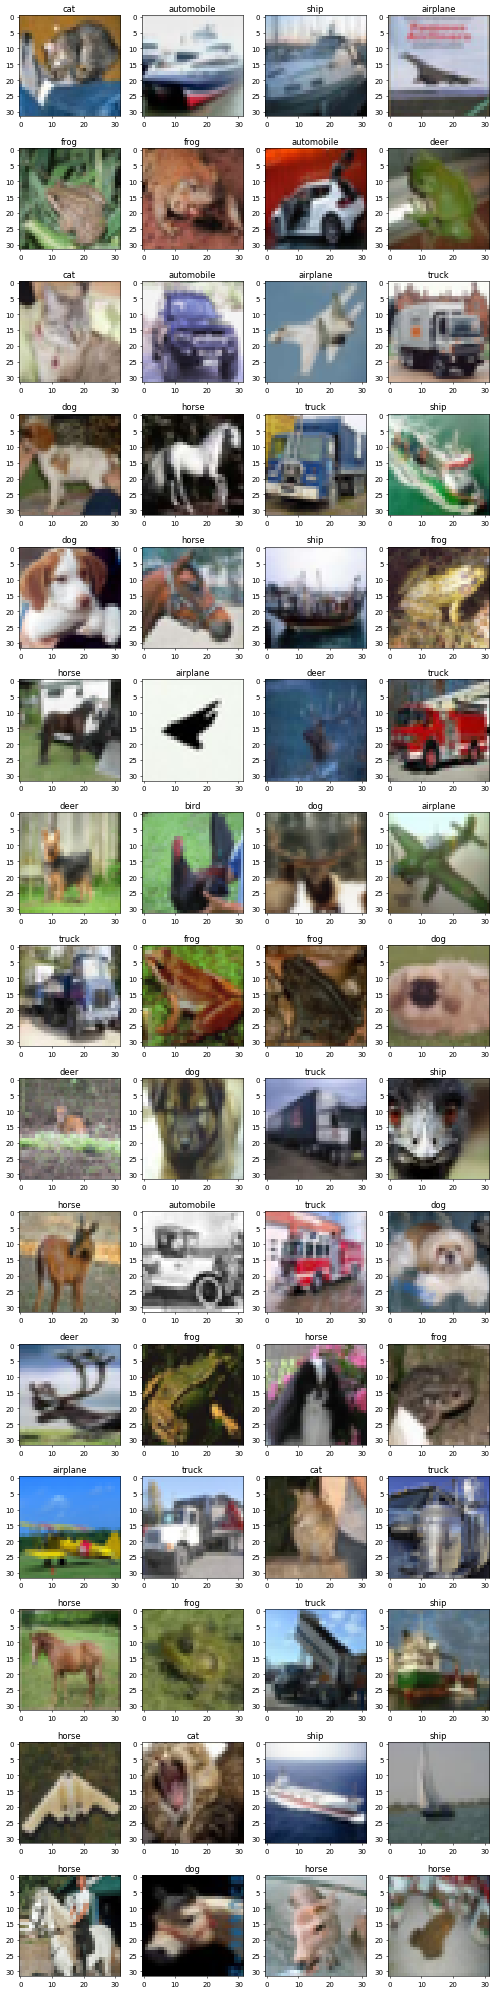

In [ ]:
plt.figure(figsize=(10,40),dpi=50)
for i in range(60):
  plt.subplot(15,4,i+1)
  plt.title(labels[(np.argmax(predict_x[i]))])
  plt.imshow(X_test[i])
plt.tight_layout()

In [ ]:
my_image = X_test[0]

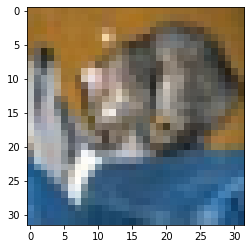

In [ ]:
plt.imshow(my_image);

In [ ]:
np.set_printoptions(formatter = {'float_kind':'{:f}'.format})
# SHAPE --> (num_images,width,height,color_channels)
model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 113ms/step


array([[0.008091, 0.002133, 0.017209, 0.699441, 0.008769, 0.133482,
        0.114345, 0.010244, 0.001301, 0.004985]], dtype=float32)